### Project: Marketing Campaign Effectiveness Analysis

**1. Import Necessary Libraries**

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve



### 2. Generate Sample Data
#### Simulate marketing campaign data

In [5]:

np.random.seed(42)



In [6]:
# Generate synthetic data
data = {
    'CustomerID': range(1, 1001),
    'Age': np.random.randint(18, 65, 1000),
    'Income': np.random.randint(20000, 120000, 1000),
    'Campaign_Channel': np.random.choice(['Email', 'Social Media', 'TV', 'Radio'], 1000),
    'Response': np.random.choice([0, 1], 1000, p=[0.7, 0.3]),  # 0 = No, 1 = Yes
    'Engagement_Score': np.random.uniform(0, 100, 1000),
    'Previous_Purchases': np.random.randint(0, 20, 1000)
}


#### Create DataFrame

In [8]:

df = pd.DataFrame(data)

# Add a feature to make the data more realistic
df['Campaign_Cost'] = df['Campaign_Channel'].map({
    'Email': 50,
    'Social Media': 100,
    'TV': 500,
    'Radio': 200
})

df['ROI'] = (df['Response'] * df['Engagement_Score'] * df['Previous_Purchases'] - df['Campaign_Cost']) / df['Campaign_Cost']

df.head()


,CustomerID,Age,Income,Campaign_Channel,Response,Engagement_Score,Previous_Purchases,Campaign_Cost,ROI
0,1,56,25287,Social Media,0,43.138065,6,100,-1.000000
1,2,46,54387,Radio,1,71.915990,10,200,2.595799
2,3,32,28512,Email,0,56.332464,17,50,-1.000000
3,4,60,21342,TV,0,42.750183,0,500,-1.000000
4,5,25,83076,Email,1,32.633843,2,50,0.305354


#### 3. Exploratory Data Analysis (EDA)

In [9]:
print("Basic Dataset Info:")
print(df.info())

print("Summary Statistics:")
print(df.describe())


Basic Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   Age                 1000 non-null   int32  
 2   Income              1000 non-null   int32  
 3   Campaign_Channel    1000 non-null   object 
 4   Response            1000 non-null   int32  
 5   Engagement_Score    1000 non-null   float64
 6   Previous_Purchases  1000 non-null   int32  
 7   Campaign_Cost       1000 non-null   int64  
 8   ROI                 1000 non-null   float64
dtypes: float64(2), int32(4), int64(2), object(1)
memory usage: 54.8+ KB
None
Summary Statistics:
        CustomerID          Age         Income     Response  Engagement_Score  \
count  1000.000000  1000.000000    1000.000000  1000.000000       1000.000000   
mean    500.500000    40.986000   69404.683000     0.322000         50.95816

#### Visualize Response Rates


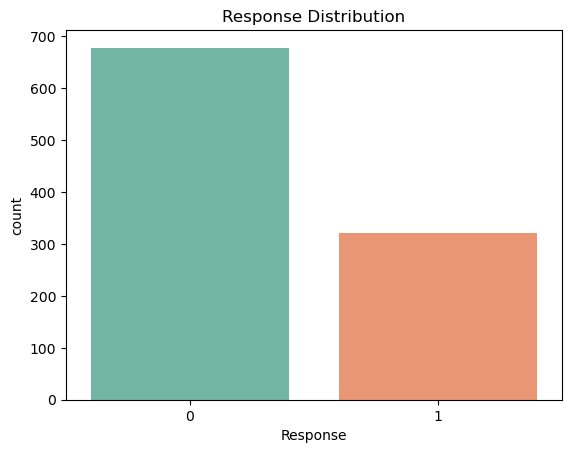

In [10]:
sns.countplot(x='Response', data=df, palette='Set2')
plt.title('Response Distribution')
plt.show()


#### Campaign Channel Analysis

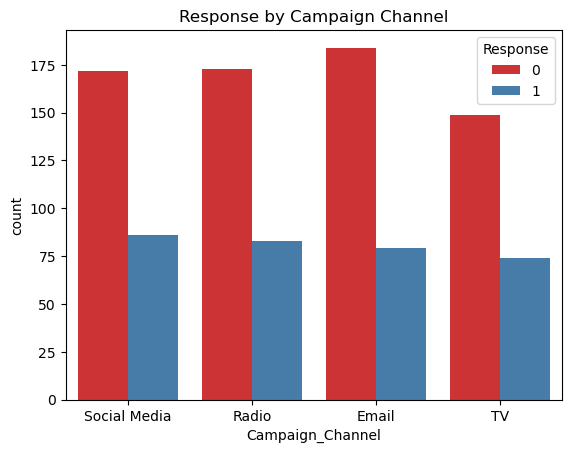

In [11]:
sns.countplot(x='Campaign_Channel', data=df, hue='Response', palette='Set1')
plt.title('Response by Campaign Channel')
plt.show()


#### Income vs Response

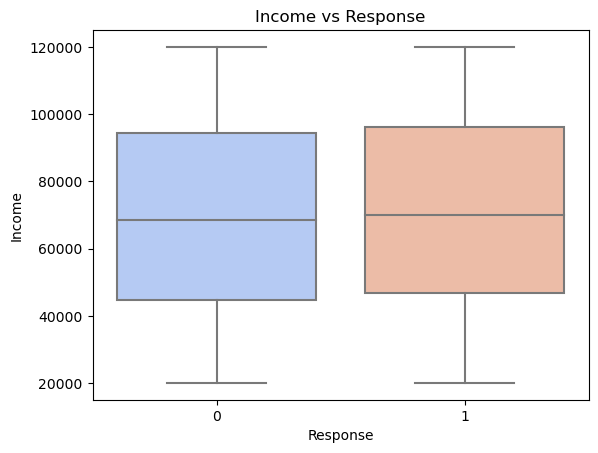

In [12]:
sns.boxplot(x='Response', y='Income', data=df, palette='coolwarm')
plt.title('Income vs Response')
plt.show()


#### Correlation Heatmap


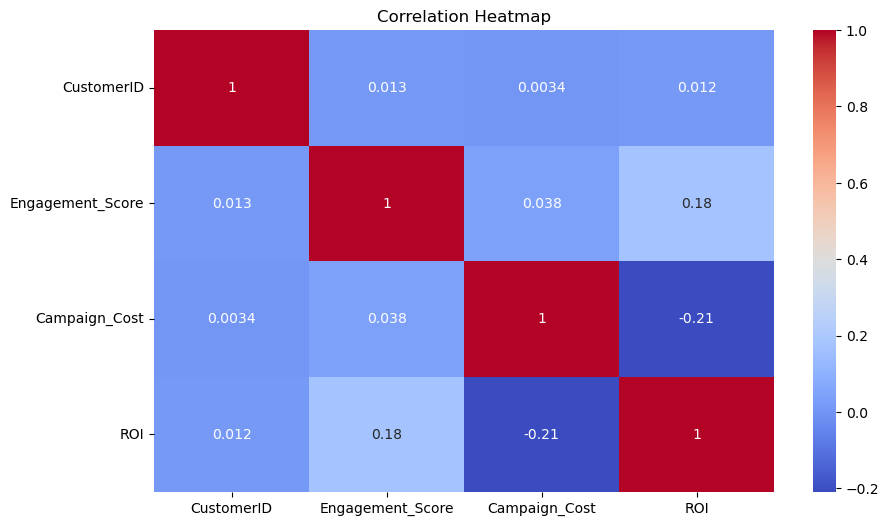

In [15]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### 4. Feature Engineering

In [16]:
# Convert categorical data to numeric
df = pd.get_dummies(df, columns=['Campaign_Channel'], drop_first=True)


In [17]:
# Define Features and Target
X = df.drop(columns=['CustomerID', 'Response', 'ROI'])
y = df['Response']


In [18]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### 5. Model Building

In [19]:

# Use Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

#### Predictions

In [20]:

y_pred = model.predict(X_test)


### 6. Model Evaluation

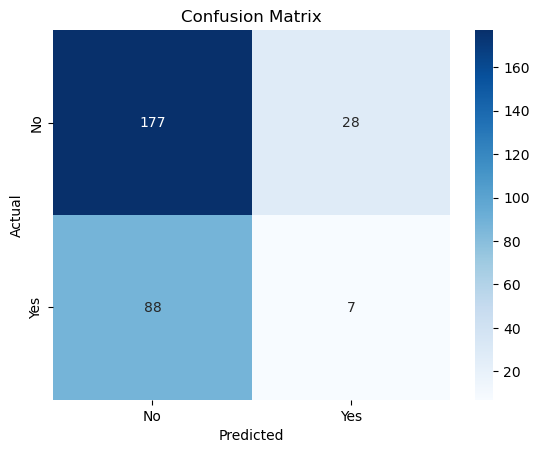

In [21]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [22]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.86      0.75       205
           1       0.20      0.07      0.11        95

    accuracy                           0.61       300
   macro avg       0.43      0.47      0.43       300
weighted avg       0.52      0.61      0.55       300



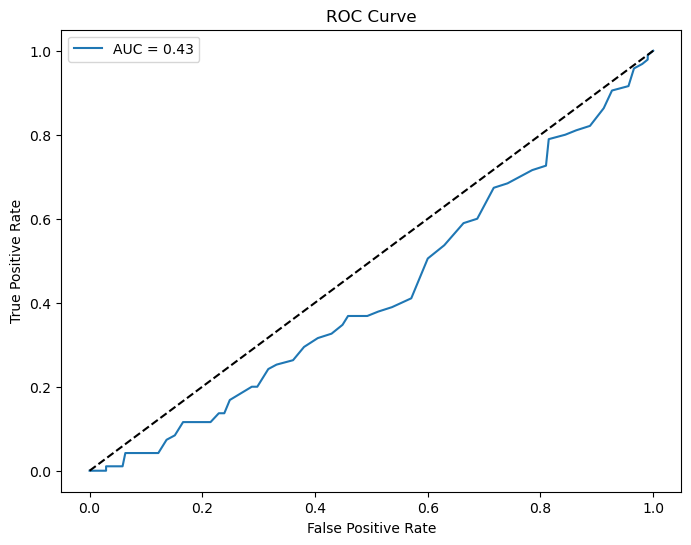

In [23]:
# ROC Curve and AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### 7. Insights and Recommendations

#### Summarize findings and suggest ways to optimize campaigns based on the analysis.
**Key Insights:**
- Response rates are higher for certain channels, like Social Media.
- Income and engagement scores are correlated with positive responses.
- Campaign cost-effectiveness can be improved by targeting high ROI segments.
